In [5]:
from models import resnet
import torch
import cv2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"USING {device}")
model = resnet.ResNet18()
model.load_state_dict(torch.load("saved_resnet18",map_location=device))
model = model.to(device)
model = model.eval()

USING cpu


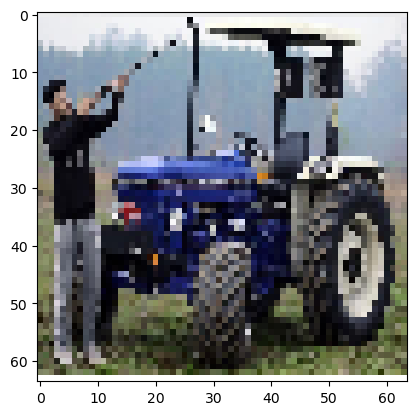

In [6]:
img = cv2.imread("tractor.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(64,64))
import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
from data.data_transforms import albumentations_transforms
test_transform = albumentations_transforms(is_train=False)
img= test_transform(img)
img.shape

torch.Size([3, 64, 64])

In [8]:
with torch.no_grad():
    img = img.unsqueeze(0)
    img_ = img.to(device)
    label = model(img_)
idx = torch.argsort(-label)
# top 5
top5_labels = [idx[0][i] for i in range(5)]
import h5py
with h5py.File("idx_to_label.h5py",'r') as f:
        for idx in top5_labels:
            print(f['label'][idx])

[b'tractor']
[b'cannon']
[b'reel']
[b'lawn mower']
[b'go-kart']
